# Import libs & Data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as  sns

In [41]:
train_df=pd.read_csv("./test_data_scientist/train.csv")
test_df=pd.read_csv("./test_data_scientist/test.csv")
bu_feat=pd.read_csv("./test_data_scientist/bu_feat.csv")

In [42]:
train_df["day_id"]=pd.to_datetime(train_df["day_id"])
test_df["day_id"]=pd.to_datetime(test_df["day_id"])
test_df=test_df.join(test_df["day_id"].dt.isocalendar())
train_df=train_df.join(train_df["day_id"].dt.isocalendar())

# Remove a weird data

In [33]:
train_df[(train_df["but_num_business_unit"]==30) & (train_df["dpt_num_department"]==88) & (train_df["week"]==44)].sort_values(by=["turnover"])

,day_id,but_num_business_unit,dpt_num_department,turnover,year,week,day
59476,2016-11-05,30,88,360.013595,2016,44,6
120320,2015-10-31,30,88,364.825805,2015,44,6
176040,2014-11-01,30,88,381.773418,2014,44,6
231272,2013-11-02,30,88,1000000.000000,2013,44,6


In [5]:
bu_feat[bu_feat["but_num_business_unit"]==30]

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
303,30,38700,45.197547,5.750372,52,4


In [43]:
train_df.loc[231272,"turnover"]=np.mean([360.013595,364.825805,381.773418])

# BU feature analysis

In [53]:
palette_region_idr = sns.color_palette(None,len(bu_feat["but_region_idr_region"].unique()))
color_palette_region_idr = dict(zip(bu_feat["but_region_idr_region"].unique(), palette_region_idr))
palette_zone_idr = sns.color_palette(None,len(bu_feat["zod_idr_zone_dgr"].unique()))
color_palette_zone_idr = dict(zip(bu_feat["zod_idr_zone_dgr"].unique(), palette_zone_idr))

Text(0.5, 0.98, 'Business unit region category')

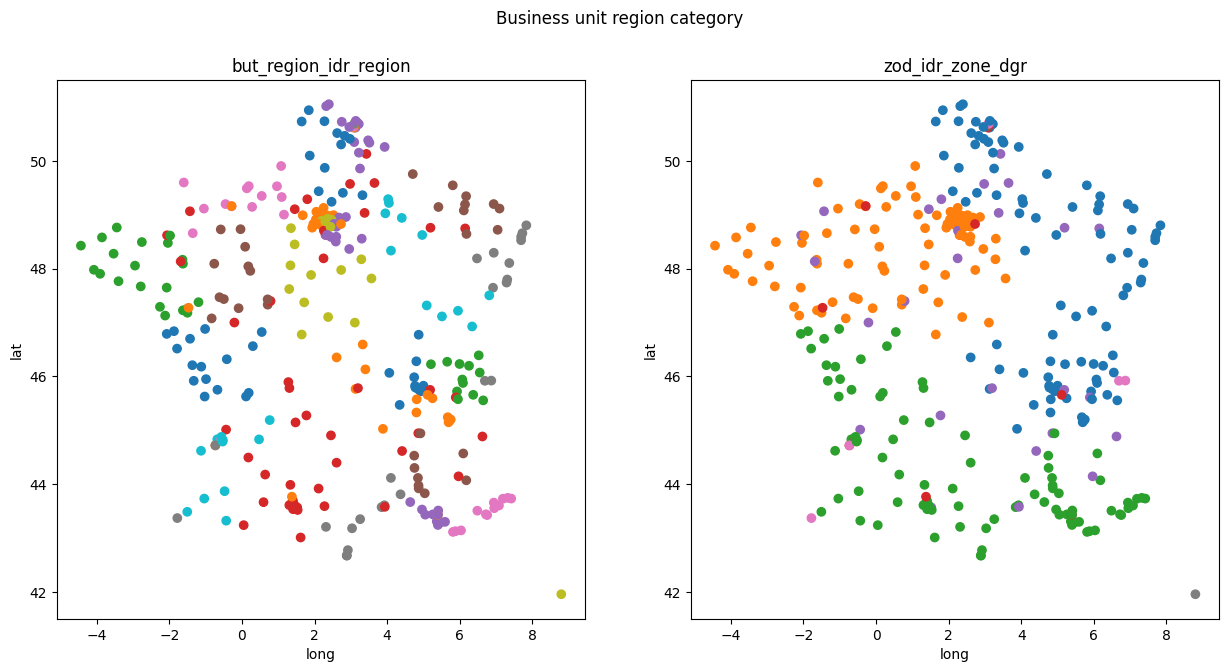

In [55]:
lat=[]
long=[]
region_idr=[]
zone_idr=[]
color_region_idr=[]
color_zone_idr=[]
for k in range(0,len(bu_feat)):
    sample = bu_feat.loc[k]
    lat.append(sample["but_latitude"])
    long.append(sample["but_longitude"])
    region_idr.append(sample["but_region_idr_region"])
    zone_idr.append(sample["zod_idr_zone_dgr"])
    color_region_idr.append(color_palette_region_idr[int(sample["but_region_idr_region"])])
    color_zone_idr.append(color_palette_zone_idr[int(sample["zod_idr_zone_dgr"])])
fig,axs=plt.subplots(1,2,figsize=(15,7))
axs[0].scatter(long,lat,color=color_region_idr)
axs[0].set_xlabel('long')
axs[0].set_ylabel('lat')
axs[0].set_title("but_region_idr_region")
axs[1].scatter(long,lat,color=color_zone_idr)
axs[1].set_title("zod_idr_zone_dgr")
axs[1].set_xlabel('long')
axs[1].set_ylabel('lat')
fig.suptitle("Business unit region category")


# Question 1

In [45]:
train_df[(train_df["week"]==38) & (train_df["year"]==2015)]

,day_id,but_num_business_unit,dpt_num_department,turnover,year,week,day
126164,2015-09-19,396,117,0.000000,2015,38,6
126165,2015-09-19,395,88,0.000000,2015,38,6
126166,2015-09-19,4,88,1014.488170,2015,38,6
126167,2015-09-19,58,127,1363.903486,2015,38,6
126168,2015-09-19,554,127,842.150910,2015,38,6
...,...,...,...,...,...,...,...
127244,2015-09-19,662,73,74.761358,2015,38,6
127245,2015-09-19,71,127,632.897336,2015,38,6
127246,2015-09-19,184,88,356.708193,2015,38,6
127247,2015-09-19,834,117,3.077770,2015,38,6


In [46]:
def calculate_year_turnover_all_dep(df:pd.DataFrame,year:int):
    df_year=df[(pd.to_datetime(df["day_id"])>pd.Timestamp('{}-01-01'.format(year))) 
                        & (pd.to_datetime(df["day_id"])<pd.Timestamp('{}-12-31'.format(year)))]
    department_list=np.sort(df_year["dpt_num_department"].unique())
    turnover_per_department=[]
    for department in department_list:
        turnover_per_department.append(calculate_turnover_dep(df_year,department))
    return dict(zip(department_list,turnover_per_department))

def calculate_turnover_dep(df:pd.DataFrame,department:int):
    df_dep=df[df["dpt_num_department"]==department]
    turnover=df_dep["turnover"].sum()
    return turnover

In [47]:
annual_turnover_list=[]
for year in range(2013,2018):
    annual_turnover_list.append(calculate_year_turnover_all_dep(train_df,year))
turnover_df=pd.DataFrame(annual_turnover_list,index=range(2013,2018))

In [39]:
turnover_df

,73,88,117,127
2013,7.870945e+05,5.594204e+06,6.740312e+06,1.486715e+07
2014,8.819583e+05,5.004523e+06,5.697419e+06,1.500810e+07
2015,9.741647e+05,5.207138e+06,6.092765e+06,1.654261e+07
2016,1.955585e+06,5.629350e+06,6.244515e+06,3.329544e+07
2017,7.878656e+05,4.316529e+06,4.101303e+06,1.467784e+07


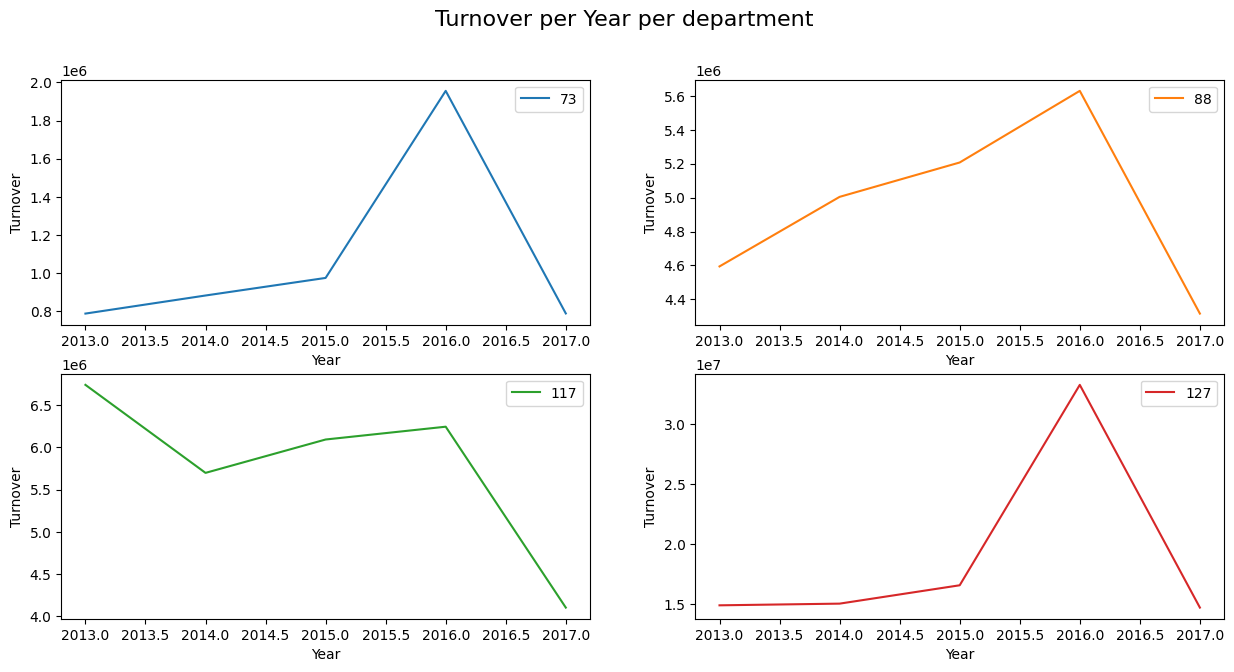

In [48]:
x=turnover_df.index
fig,axs = plt.subplots(2,2,figsize=(15,7))
fig.suptitle('Turnover per Year per department', fontsize=16)
color_plot=sns.color_palette(None,len(x))
for i,(department,ax) in enumerate(zip(turnover_df.keys(),axs.reshape(-1))):
    ax.plot(x,turnover_df[department].to_numpy(),label=department,color=color_plot[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Turnover')
    ax.legend()
plt.show()

# Question 2

In [49]:
def calculate_turnover_per_week_all_dep(df:pd.DataFrame,year:int):
    df_year=df[df["year"]==year]
    list_of_week=np.sort(df_year["week"].unique())
    department_list=np.sort(df_year["dpt_num_department"].unique())
    week_turnover_list=[]
    for week in list_of_week:
        turnover_per_department=[]
        for department in department_list:
            turnover_per_department.append(calculate_turnover_dep_week(df_year,department,week))
        
        week_turnover_list.append(dict(zip(department_list,turnover_per_department)))
    return pd.DataFrame(week_turnover_list,index=list_of_week)
        

def calculate_turnover_dep_week(df:pd.DataFrame,department:int,week:int):
    df_week=df[df["week"]==week]
    return calculate_turnover_dep(df=df_week,department=department)
            

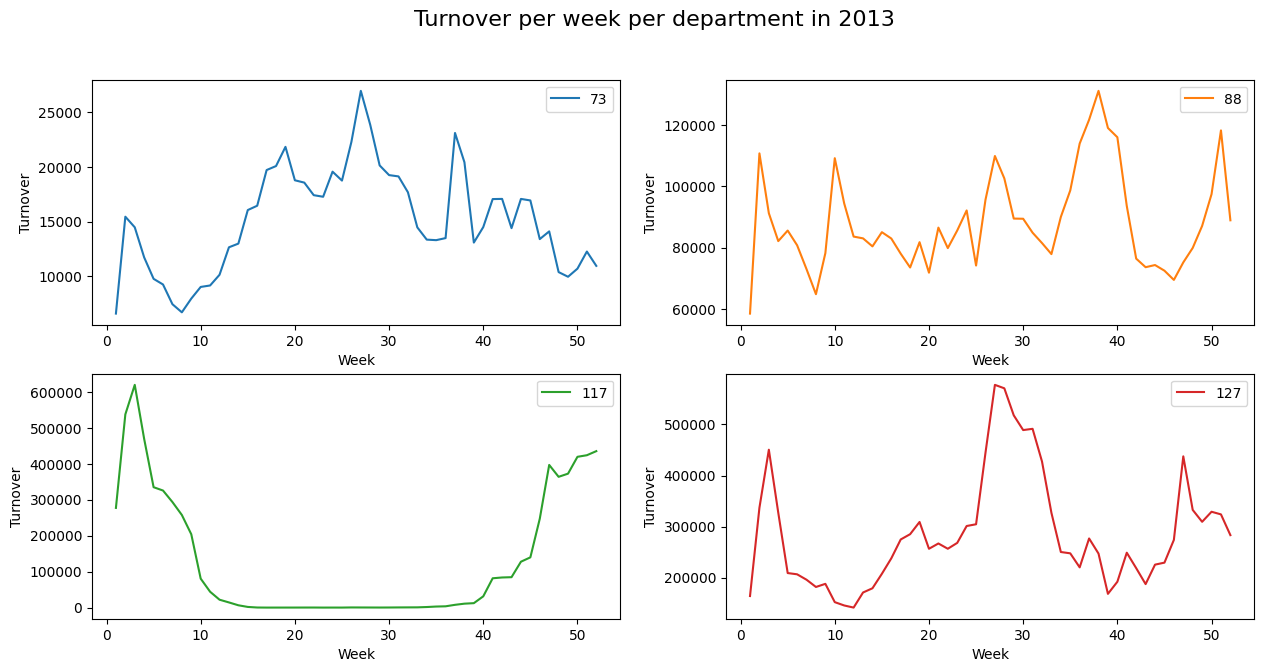

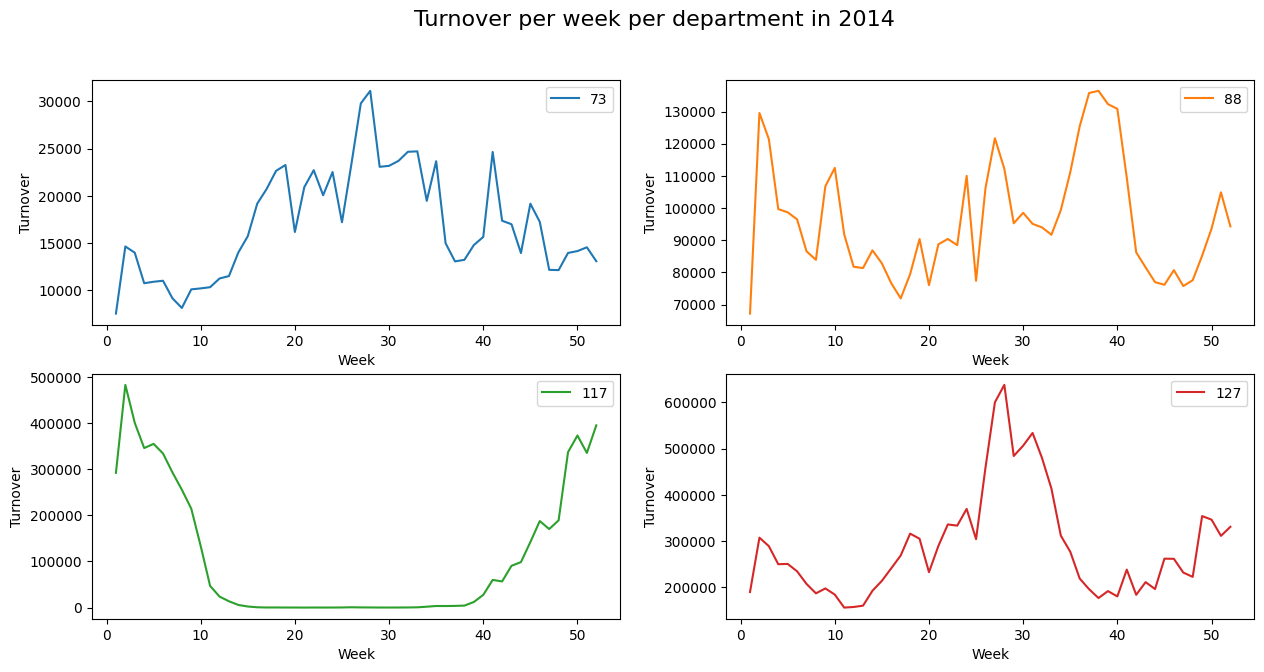

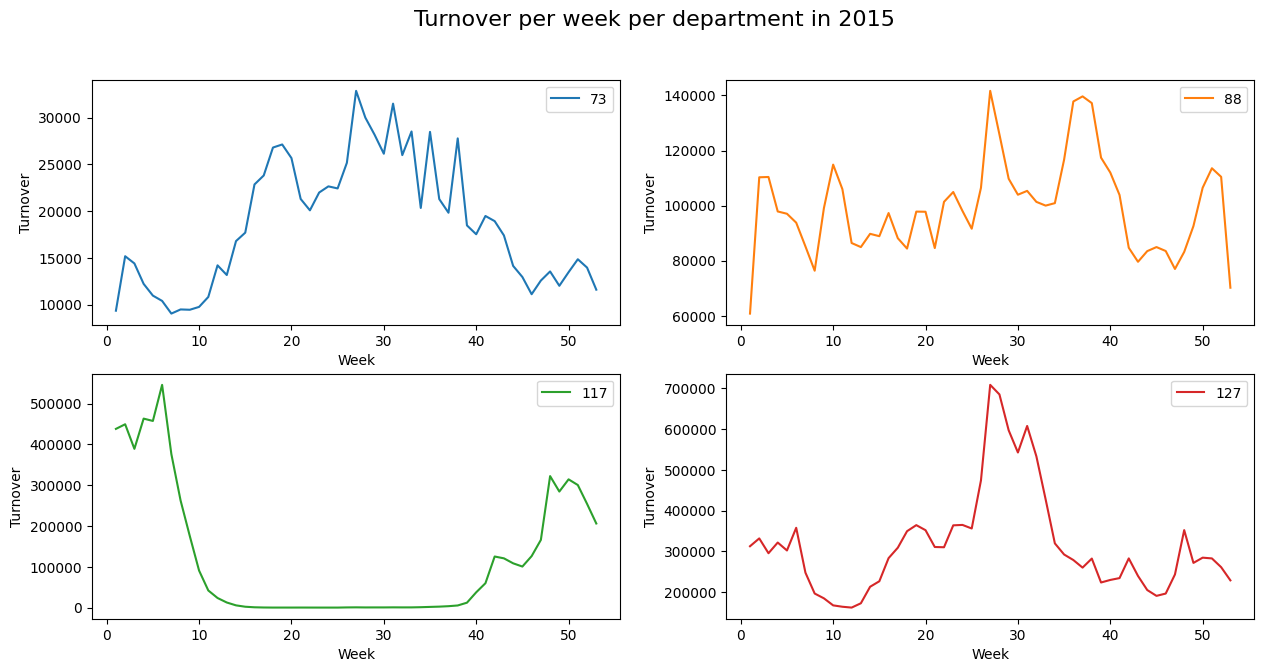

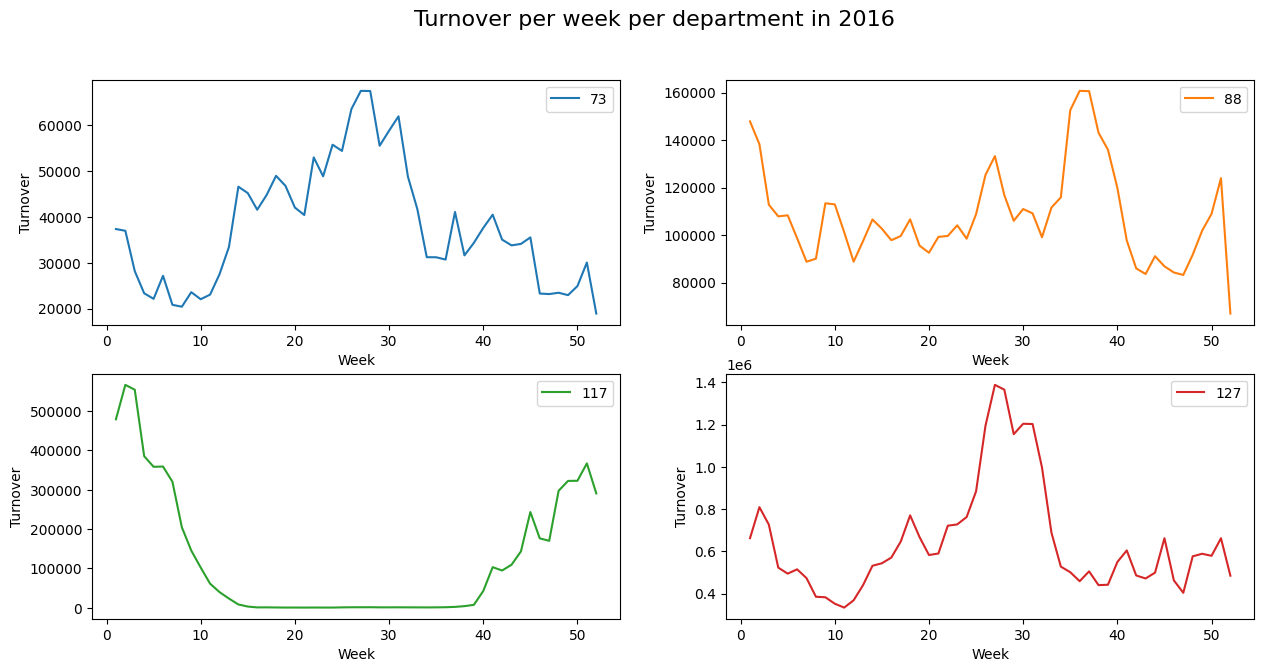

In [52]:
for year in range(2013,2017):
    # year=2014
    turnover_per_week_df=calculate_turnover_per_week_all_dep(train_df,year)
    x=turnover_per_week_df.index
    figure,axs = plt.subplots(2,2,figsize=(15,7))
    figure.suptitle('Turnover per week per department in {}'.format(year), fontsize=16)
    color_plot=sns.color_palette(None,len(x))
    for i,(department,ax) in enumerate(zip(turnover_per_week_df.keys(),axs.reshape(-1))):
        ax.plot(x,turnover_per_week_df[department].to_numpy(),label=department,color=color_plot[i])
        ax.set_xlabel('Week')
        ax.set_ylabel('Turnover')
        ax.legend()
    plt.show()

In [17]:
turnover_per_week_df=calculate_turnover_per_week_all_dep(train_df,2015)
turnover_per_week_df.sort_values(by=[88],ascending=False).head(5)

,73,88,117,127
27,32868.465958,141679.864768,765.596355,708258.754149
37,19828.774369,139674.400588,3602.315532,260511.541925
36,21290.579278,137825.642436,2509.631642,279083.680891
38,27783.256365,137232.460861,5359.341311,282653.271077
28,30004.491647,125835.541415,542.109672,684804.305833


# Question 3

In [20]:
def turnover_per_store(df:pd.DataFrame):
    num_bu_list=df["but_num_business_unit"].unique()
    turnover_list=[]
    for num_bu in num_bu_list:
        turnover_list.append(df[df["but_num_business_unit"]==num_bu]["turnover"].sum())
    return pd.DataFrame(turnover_list,index=num_bu_list,columns=['turnover'])

def turnover_per_store_per_year(df:pd.DataFrame,year=int):
    df_year=df[df["year"]==year]
    return turnover_per_store(df_year)

In [21]:
top_perf=turnover_per_store_per_year(train_df,2014).sort_values(by=['turnover'],ascending=False).head(5).index

In [22]:
top_perf

Int64Index([121, 17, 118, 189, 100], dtype='int64')

In [23]:
bu_feat[bu_feat["but_num_business_unit"].isin(top_perf)]

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
20,100,44800,47.223866,-1.627007,107,6
45,121,69500,45.725769,4.928200,8,4
59,118,59650,50.644545,3.142438,65,4
167,17,34000,43.605718,3.923199,6,10
176,189,75000,48.869257,2.325360,75,6


# Check

Checking that there is no missing week in the data :

In [6]:
import tqdm
bu_list=train_df["but_num_business_unit"].unique()
first_day=[]
issue=[]
for bu in tqdm.tqdm(bu_list):
    dep_list=train_df[train_df["but_num_business_unit"]==bu]["dpt_num_department"].unique()
    for dep in dep_list:
        L=[]
        temp=train_df[(train_df["but_num_business_unit"]==bu) & (train_df["dpt_num_department"]==dep)]
        date_min=np.min(temp["day_id"])
        date_max=np.max(temp["day_id"])
        day=date_min
        while day<=date_max:
            L.append(day)
            day+=pd.DateOffset(weeks=1)
        if (temp["day_id"].to_numpy()[::-1]!=pd.to_datetime(np.array(L))).all():
            issue.append((bu,dep,temp["day_id"].to_numpy()[::-1],np.array(L)))
print("Number of missing weeks : {}".format(len(issue)))
        


100%|██████████| 321/321 [00:03<00:00, 86.72it/s] 
